# Imports

In [35]:
# Data
import pandas as pd
import numpy as np

# Time
from datetime import datetime

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from interpret import show
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

# Black Box Models
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Glass Box Models
from interpret.glassbox import ExplainableBoostingRegressor

# Tuning
from sklearn.model_selection import GridSearchCV

# Metrics 
from sklearn.metrics import mean_squared_error

# XAI
from sklearn.inspection import permutation_importance
from interpret.blackbox import LimeTabular
import shap
import lime 
import lime.lime_tabular

# AutoML
from autogluon.tabular import TabularDataset, TabularPredictor

# Other 
import pickle


# Data

In [2]:
df_artists = pd.read_csv("artists.csv")

In [3]:
df_artists = df_artists.rename(columns = {"popularity" : "artist_popularity", "id" : "artist_id", "name": "artist_name", "followers" : "artist_followers"})

In [4]:
df_artists.head()

,artist_id,artist_followers,genres,artist_name,artist_popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
df_song = pd.read_csv("tracks.csv")

In [6]:
df_song.shape


(586672, 20)

In [7]:
df_song.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
df_song.sort_values(by = "popularity", ascending= False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


In [9]:
df_song["name"].value_counts()

Summertime                                  101
Intro                                        92
Year 3000                                    91
Hold On                                      87
2000 Years                                   76
                                           ... 
0024 - und die silberne Spinne - Teil 31      1
בוקר של קרנבל                                 1
0024 - und die silberne Spinne - Teil 30      1
Disguise                                      1
A Day At A Time                               1
Name: name, Length: 446474, dtype: int64

In [10]:
df_song.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [11]:
artists_id = df_song["id_artists"]
artist_id = [l.strip('"]["').split(', ')[0] for l in artists_id]
artist_id = [l.replace("'", "") for l in artist_id]

df_song["artist_id"] = artist_id

In [12]:
df_song.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su


In [13]:
df = df_song.merge(df_artists, on = "artist_id", how = "left")
df.shape

(586672, 25)

In [14]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,artist_followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0


In [15]:
df["genres"].value_counts()

[]                                                                                   48692
['hoerspiel']                                                                         8174
['tango', 'vintage tango']                                                            2644
['classic bollywood', 'desi pop', 'filmi', 'sufi']                                    2357
['classical', 'classical era']                                                        2109
                                                                                     ...  
['exotica', 'lounge', 'moog', 'vintage french electronic', 'zolo']                       1
['country boogie', 'rockabilly', 'western swing']                                        1
['lo-fi cover', 'slap house']                                                            1
['alt z', 'contemporary country']                                                        1
['alt z', 'alternative r&b', 'bedroom pop', 'indie cafe pop', 'indie pop', 'pop']        1

In [16]:
dates = df["release_date"]

In [17]:
dates_type = [len(l.split("-")) for l in dates]

In [18]:
# Number of dates that are just year
dates_type.count(1)

136489

In [19]:
# Number of dates that are spesific dates
dates_type.count(3)

448081

In [20]:
release_year = [int(l.split("-")[0]) for l in dates]
df["release_year"] = release_year

## Variable Selection

In [21]:
response = "popularity"

cat_cols = list(df.select_dtypes(exclude="number").columns)
num_cols = list(df.select_dtypes(include="number").columns)

num_cols.remove(response)

cat_cols.remove("name") # Song has too few unique values
cat_cols.remove("id")
cat_cols.remove("id_artists")
cat_cols.remove("artist_id")
cat_cols.remove("artists")
cat_cols.remove("release_date")

# Without artist predictos
cat_cols.remove("artist_name")
cat_cols.remove("genres")

num_cols.remove("artist_followers")
num_cols.remove("artist_popularity")

# Without year 
num_cols.remove("release_year")


predictors = cat_cols + num_cols

In [44]:
df_predictors = df[predictors + [response]]

In [45]:
df_train, df_test = train_test_split(df_predictors, test_size = 0.2, random_state = 42)

In [46]:
df_train.to_csv("train.csv", index = False)
df_test.to_csv("test.csv", index = False)

# AutoML

In [47]:
train_data = TabularDataset("train.csv")
test_data = TabularDataset("test.csv")

Loaded data from: train.csv | Columns = 15 / 15 | Rows = 469337 -> 469337
Loaded data from: test.csv | Columns = 15 / 15 | Rows = 117335 -> 117335


In [50]:
gluon_model = TabularPredictor(label = response, problem_type="regression")

gluon_predictor = gluon_model.fit(train_data=train_data, time_limit= 600)

No path specified. Models will be saved in: "AutogluonModels\ag-20230221_171153\"
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230221_171153\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    469337
Train Data Columns: 14
Label Column: popularity
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3225.47 MB
	Train Data (Original)  Memory Usage: 52.57 MB (1.6% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 

[1000]	valid_set's rmse: 14.9227
[2000]	valid_set's rmse: 14.8434
[3000]	valid_set's rmse: 14.7989
[4000]	valid_set's rmse: 14.7686
[5000]	valid_set's rmse: 14.7456
[6000]	valid_set's rmse: 14.7369
[7000]	valid_set's rmse: 14.7168
[8000]	valid_set's rmse: 14.7077
[9000]	valid_set's rmse: 14.7027
[10000]	valid_set's rmse: 14.6926


	-14.6924	 = Validation score   (-root_mean_squared_error)
	111.28s	 = Training   runtime
	1.76s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 469.72s of the 469.72s of remaining time.


[1000]	valid_set's rmse: 14.83
[2000]	valid_set's rmse: 14.7464
[3000]	valid_set's rmse: 14.7164
[4000]	valid_set's rmse: 14.6847
[5000]	valid_set's rmse: 14.6726
[6000]	valid_set's rmse: 14.6569
[7000]	valid_set's rmse: 14.6448
[8000]	valid_set's rmse: 14.6393
[9000]	valid_set's rmse: 14.6386
[10000]	valid_set's rmse: 14.6293


	-14.6279	 = Validation score   (-root_mean_squared_error)
	123.74s	 = Training   runtime
	4.26s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 340.05s of the 340.05s of remaining time.
	-14.6219	 = Validation score   (-root_mean_squared_error)
	231.76s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 108.02s of the 108.02s of remaining time.
	Ran out of time, early stopping on iteration 1717.
	-14.8731	 = Validation score   (-root_mean_squared_error)
	108.16s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -0.22s of remaining time.
	-14.5202	 = Validation score   (-root_mean_squared_error)
	0.3s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 600.92s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonMo

In [52]:
gluon_preds = gluon_model.predict(test_data)

In [54]:
y_test = test_data[response]
auto_rmse = round(np.sqrt(mean_squared_error(y_test, gluon_preds)),2)
auto_rmse

14.27

# Preprocessing

In [133]:
X_full = df.copy()

In [134]:
ssc = StandardScaler()
ssc.fit(X_full[num_cols])
X_full[num_cols] = ssc.transform(X_full[num_cols])

X_full.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,artist_id,artist_followers,genres,artist_name,artist_popularity,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,-0.815233,-0.214754,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-0.341434,-1.650527,-0.457392,-1.845842,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,-1.042088,-0.214754,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-0.357710,0.398600,-0.552876,-6.072724,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,-0.382618,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-0.010498,-0.369823,0.401596,2.381040,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,-0.420026,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-0.596418,-0.602678,1.730782,-1.845842,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,-0.529308,-0.214754,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,0.526596,-1.382743,-0.512190,0.267599,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listening', 'lounge', 'swing']",Dick Haymes,35.0,1922


In [135]:
for col in X_full.columns:
    if col in cat_cols:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(X_full[col].values))
        X_full[col] = lbl.transform(list(X_full[col].values))


In [136]:
X_full.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,artist_id,artist_followers,genres,artist_name,artist_popularity,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,-0.815233,-0.214754,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-0.341434,-1.650527,-0.457392,-1.845842,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,-1.042088,-0.214754,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-0.357710,0.398600,-0.552876,-6.072724,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,-0.382618,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-0.010498,-0.369823,0.401596,2.381040,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,-0.420026,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-0.596418,-0.602678,1.730782,-1.845842,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,-0.529308,-0.214754,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,0.526596,-1.382743,-0.512190,0.267599,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listening', 'lounge', 'swing']",Dick Haymes,35.0,1922


In [137]:
X_full.isnull().sum()

id                       0
name                    71
popularity               0
duration_ms              0
explicit                 0
artists                  0
id_artists               0
release_date             0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
artist_id                0
artist_followers     12416
genres               12415
artist_name          12415
artist_popularity    12415
release_year             0
dtype: int64

In [138]:
predictors

['duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [139]:
X_full.shape

(586672, 26)

Sample a fraction of the data to test models. Use full data when making final model

In [140]:
X_sub = X_full.sample(frac = 1, ignore_index= True, random_state=42)

Can also have a large test data set to reduce time and make error estimate better. This reduces the quality of the model obviously

In [141]:
y = X_sub[response]
X = X_sub[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [142]:
df_sub = X_sub[predictors + [response]]

df_train, df_test = train_test_split(df_sub, test_size= 0.2, random_state = 42 )

In [143]:
df_train.to_csv("train_processed.csv", index = False)

df_test.to_csv("test_processed.csv", index = False)

In [144]:
df_train.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'popularity'],
      dtype='object')

# Visualization

## Response

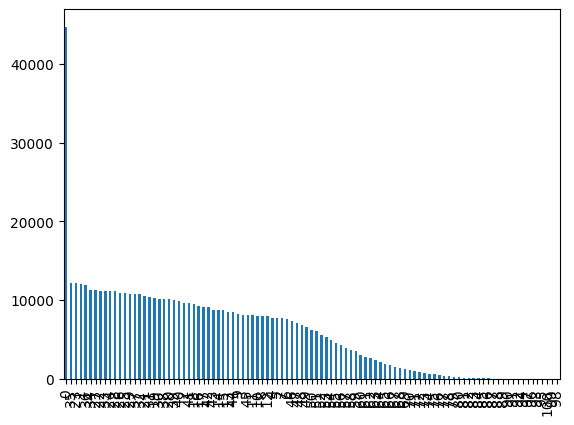

In [32]:
df[response].value_counts().plot(kind = "bar")
plt.show()

## Categorical Variable

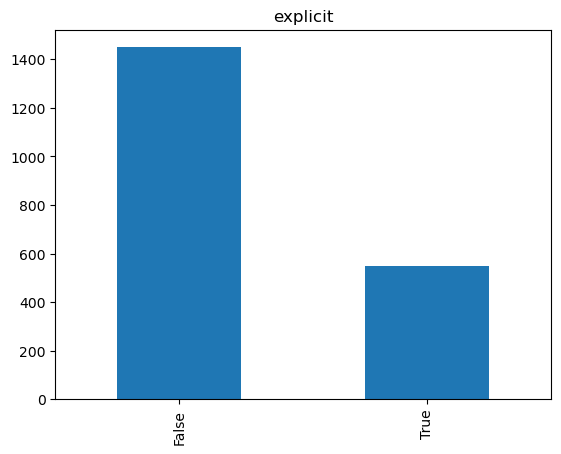

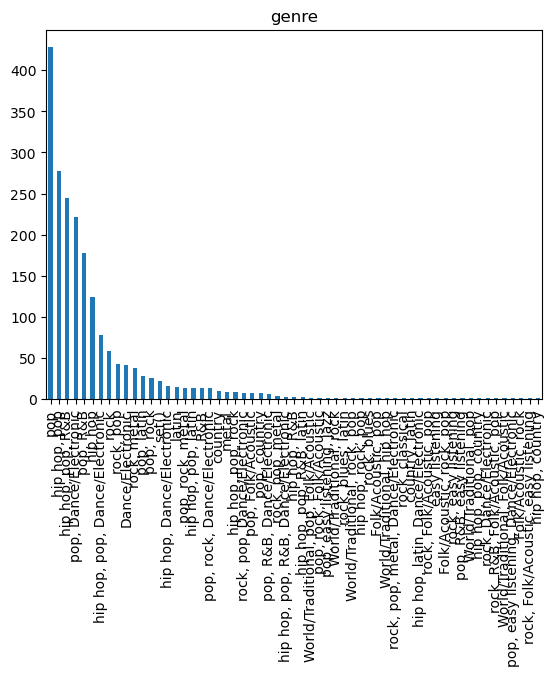

In [30]:
for var in cat_cols_plot:
    plt.title(var)
    df[var].value_counts().plot(kind = "bar")
    plt.show()

## Numerical Variables

In [58]:
sns.pairplot(X, vars =['duration_ms',
 'danceability',
 'energy',
 'loudness','speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo'])

: 

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


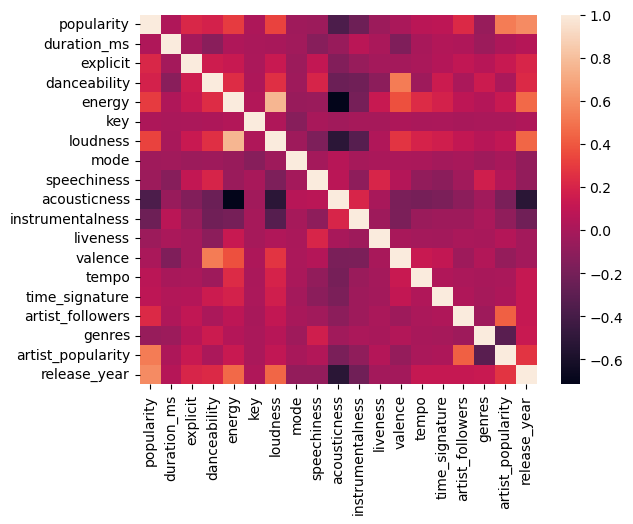

In [41]:
sns.heatmap(X_full.corr())
plt.show()

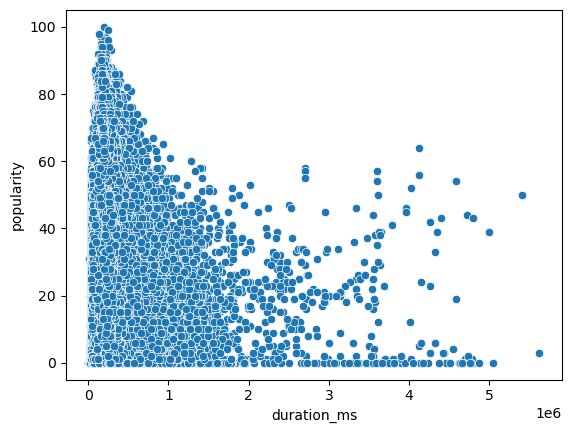

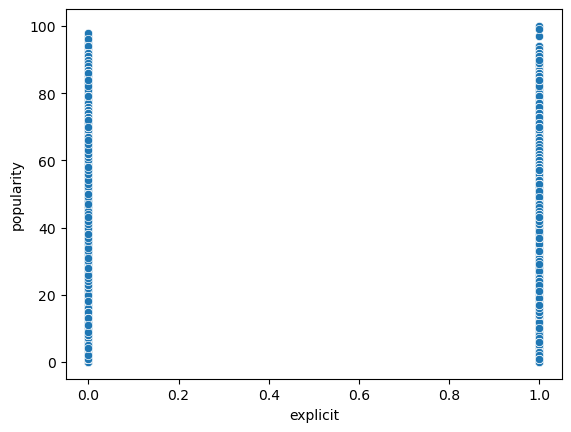

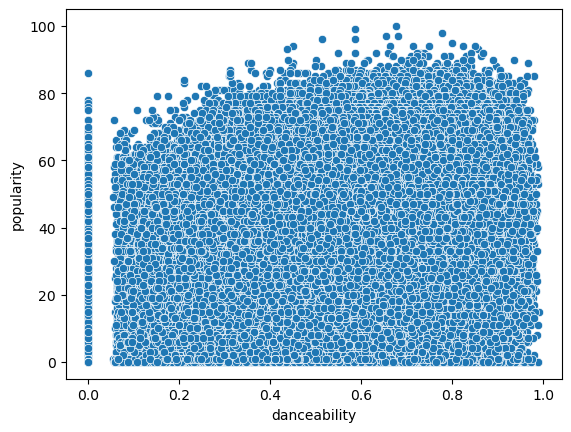

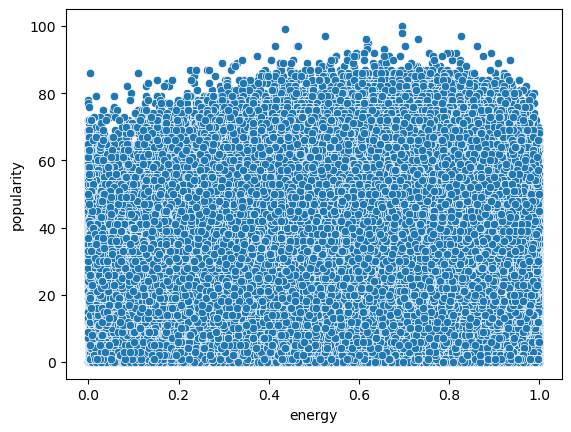

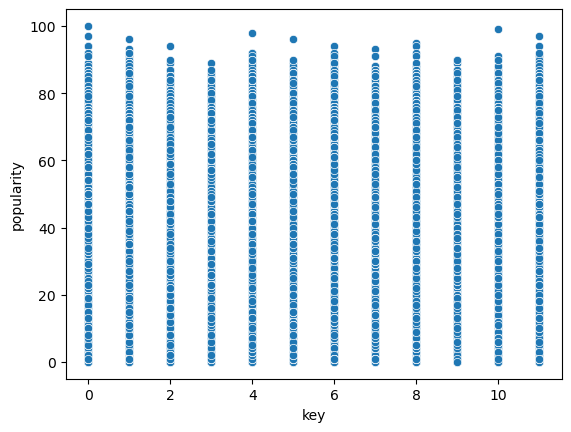

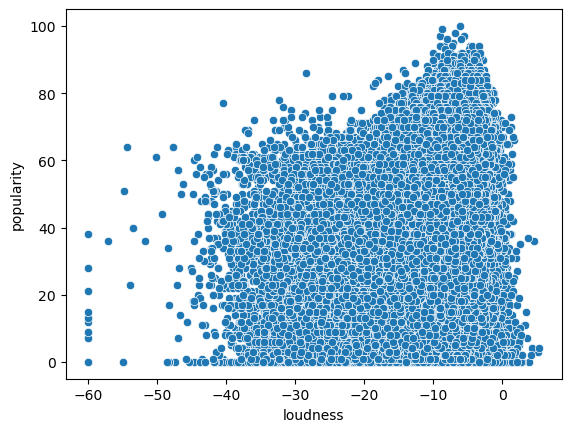

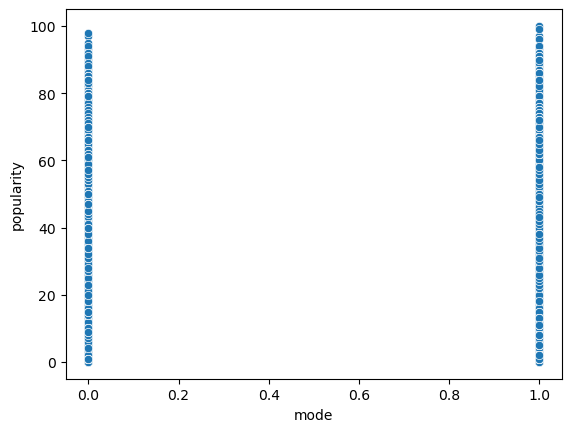

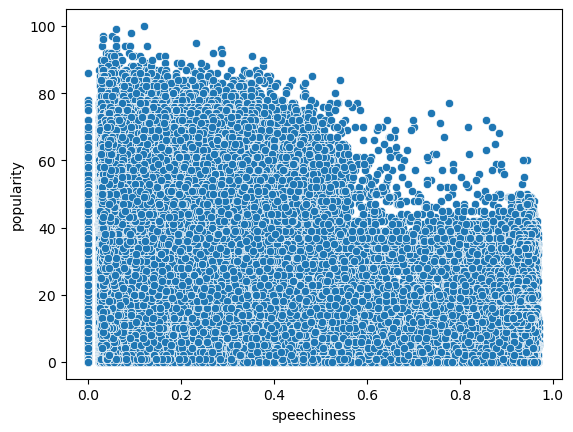

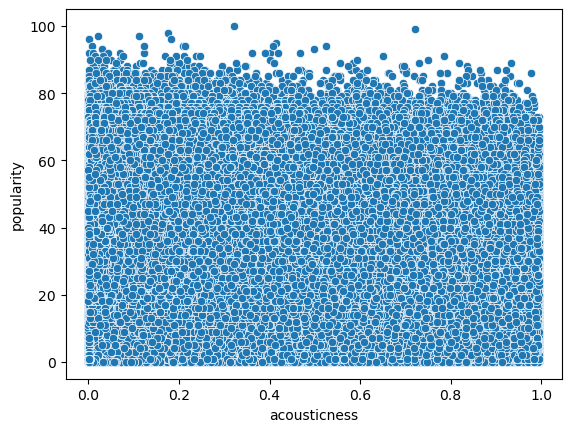

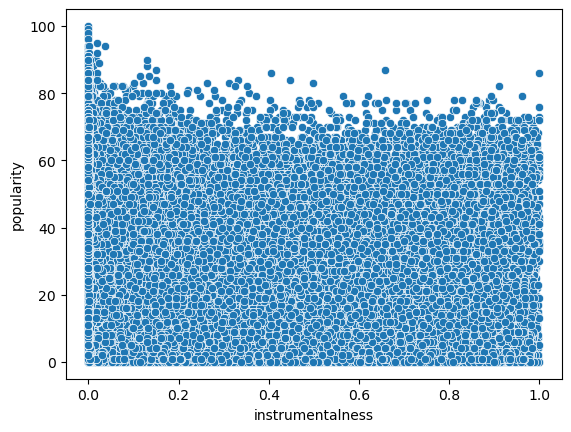

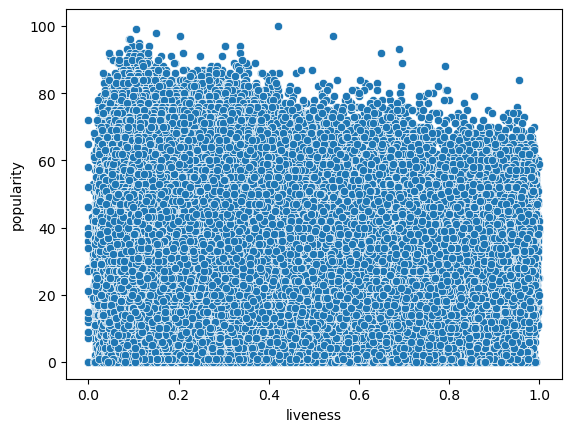

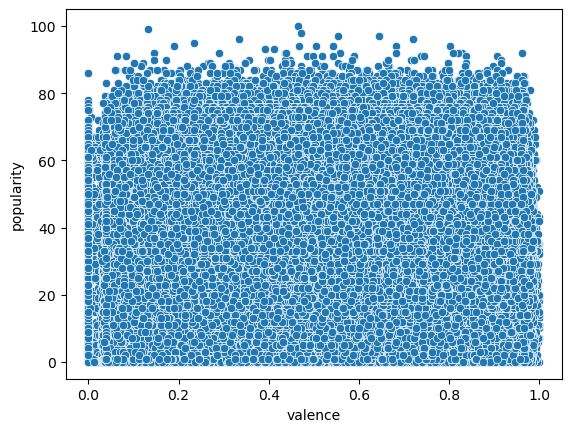

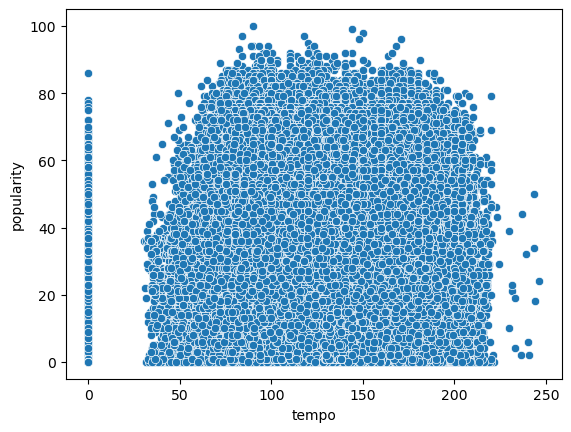

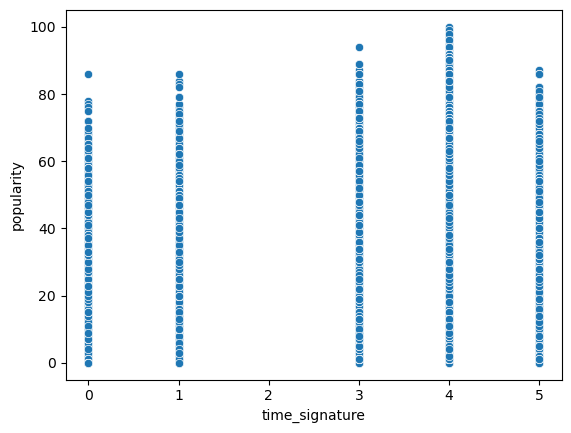

In [32]:
for var in num_cols:
    sns.scatterplot(data = df, x = var, y = response)
    plt.show()

# Lowess

In [29]:
lowess = sm.nonparametric.lowess

In [47]:
X_sub = X_full.sample(n = 100000)
# X_sub = X_full.copy()

In [48]:
X_sub.shape

(100000, 26)

In [49]:
y = X_sub[response]
X_sub = X_sub.drop(columns=response)

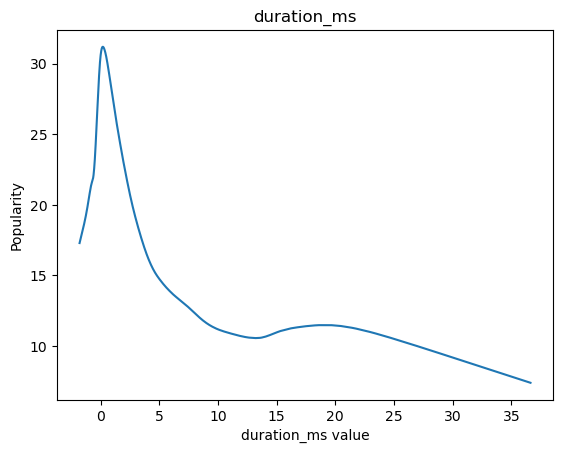

invalid value encountered in divide


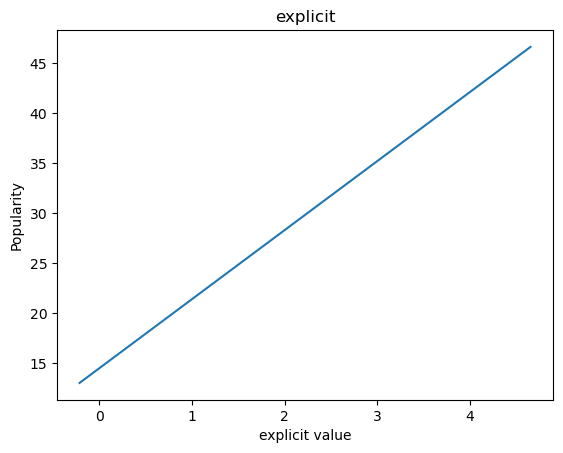

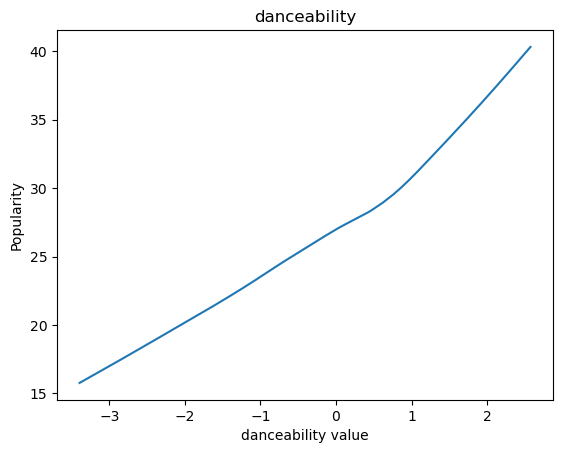

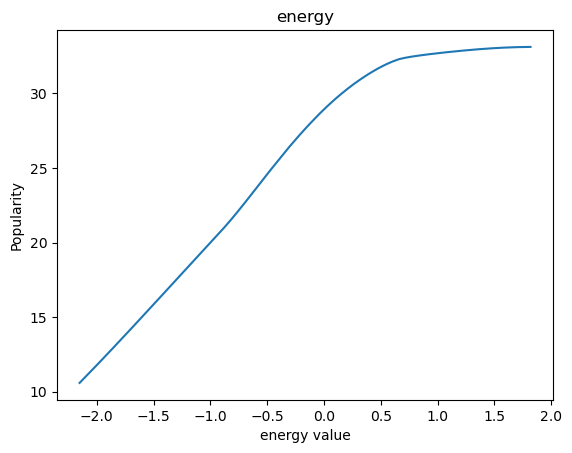

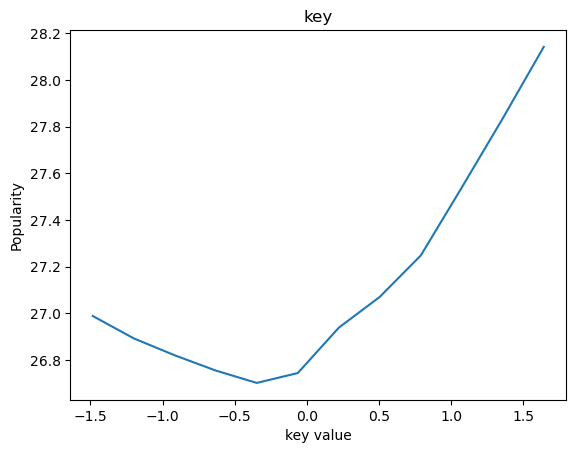

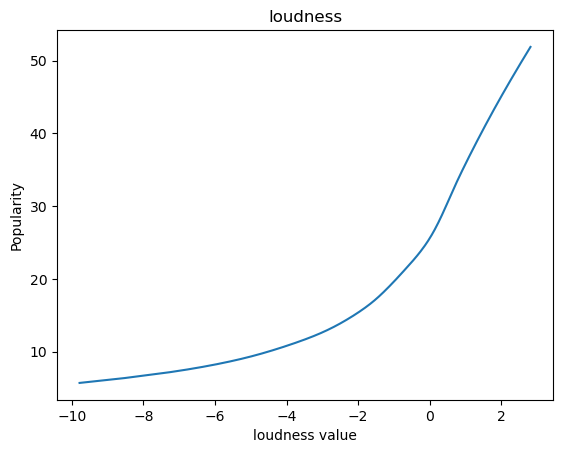

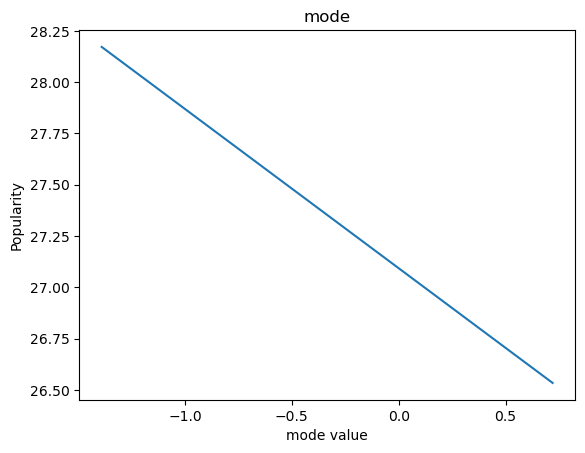

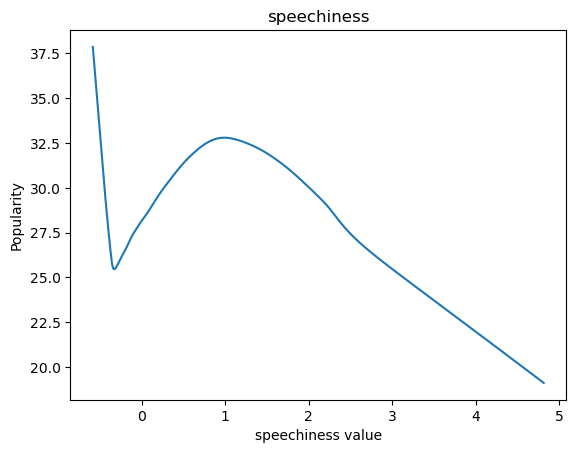

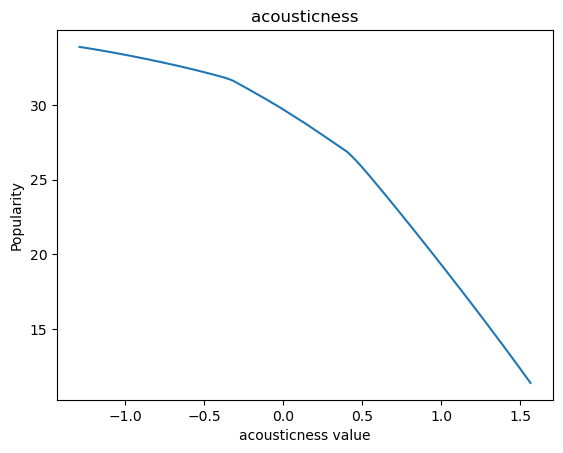

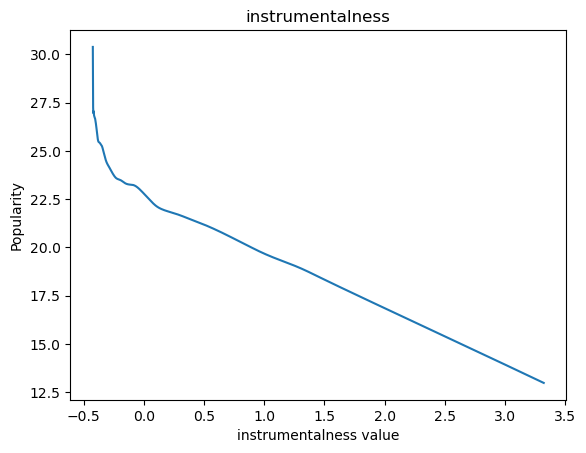

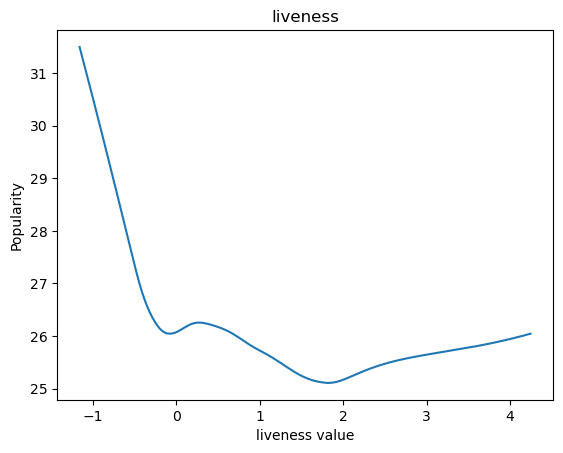

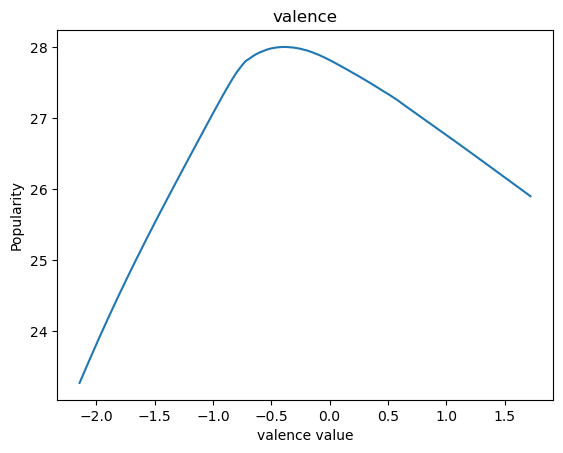

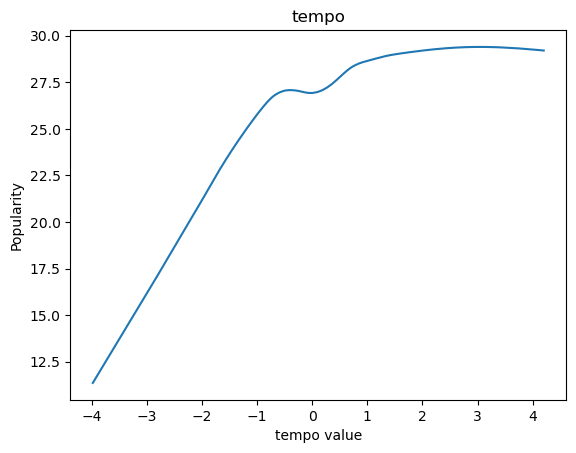

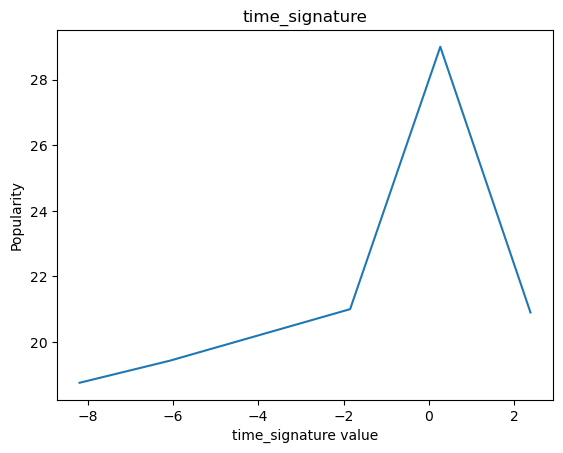

In [50]:
re_weightings = 1 # Base 3
fraction_of_data = 2./3 # Base 2./3

for var in num_cols:
    exog = X_sub[var]
    delta =  0.0001*(exog.max() - exog.min()) # Base 0
    y_hat = lowess(y, exog = exog, it = re_weightings, frac = fraction_of_data, delta = delta)
    
    plt.plot(y_hat[:,0], y_hat[:,1])
    plt.title(var)
    plt.ylabel("Popularity")
    plt.xlabel(f"{var} value")
    plt.show()

# Modeling


## AutoGluon

In [145]:
train_data = TabularDataset("train_processed.csv")
test_data = TabularDataset("test_processed.csv")

Loaded data from: train_processed.csv | Columns = 15 / 15 | Rows = 469337 -> 469337
Loaded data from: test_processed.csv | Columns = 15 / 15 | Rows = 117335 -> 117335


In [130]:
gluon_model = TabularPredictor(label = response, problem_type="regression")

gluon_predictor = gluon_model.fit(train_data=train_data, time_limit = 20*60)

No path specified. Models will be saved in: "AutogluonModels\ag-20230221_202431\"
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels\ag-20230221_202431\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    117334
Train Data Columns: 14
Label Column: popularity
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5090.35 MB
	Train Data (Original)  Memory Usage: 13.14 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3

[1000]	valid_set's rmse: 15.05
[2000]	valid_set's rmse: 15.0109
[3000]	valid_set's rmse: 15.0024


	-14.9914	 = Validation score   (-root_mean_squared_error)
	12.56s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1181.82s of the 1181.82s of remaining time.


[1000]	valid_set's rmse: 15.0432


	-15.0337	 = Validation score   (-root_mean_squared_error)
	7.45s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1174.11s of the 1174.11s of remaining time.
	-15.037	 = Validation score   (-root_mean_squared_error)
	173.54s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 999.72s of the 999.71s of remaining time.
	-15.028	 = Validation score   (-root_mean_squared_error)
	27.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 971.74s of the 971.74s of remaining time.
	-14.9866	 = Validation score   (-root_mean_squared_error)
	31.51s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 939.39s of the 939.38s of remaining time.
	-15.1185	 = Validation score   (-root_mean_squared_error)
	161.26s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting mo

In [131]:
gluon_preds = gluon_model.predict(test_data)

In [132]:
y_test = test_data[response]
auto_rmse = round(np.sqrt(mean_squared_error(y_test, gluon_preds)), 2)
auto_rmse

14.61

## XGBoost

In [122]:
xgb_model = xgb.XGBRegressor(n_estimators = 1000)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [123]:
xgb_preds = xgb_model.predict(X_test)
# np.savetxt("xgb_preds.csv", xgb_preds)

In [124]:
xgb_rmse = round(np.sqrt(mean_squared_error(y_test, xgb_preds)),2)
xgb_rmse

15.37

All predictors: 83.11653682689274 
Without year and artist popularity: 118.08175764235904

In [46]:
# Completely random prediction (worste case)
rand_preds = np.random.uniform(low = 0, high = 100, size = len(y_test))

In [47]:
round(np.sqrt(mean_squared_error(y_test, rand_preds)),2)

1668.3729993664283

So the model is better than random guessing. Try to use mean of training data as predictor. This uses no predictors

In [48]:
# Mean prediction
mean = np.mean(y_train)

mean_preds = np.repeat(mean, len(y_test))

In [49]:
round(np.sqrt(mean_squared_error(y_test, mean_preds)),2)

334.6183864004297

### Explaination

In [ ]:
model = xgb_model

#### LIME

In [67]:
index = 1

explainer = lime.lime_tabular.LimeTabularExplainer(
    data = X_train,
    fearture_names = X_train.columns
    mode = "regression"
)

lime_local = lime.explain_local(X_test[5:], 
                                y_test[5:],
                                name = "LIME")

exp = explainer.explain_instance(X_test[index], model.predict, num_features = len(predictors))

exp.show_in_notebook(show_table = True)

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

#### SHAP

In [69]:
model = xgb_model

In [70]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


##### Local

In [72]:
shap.initjs()

prediction = model.predict(X_test)
index = 3 # Index of data point where we give a local explenation


print(f"The RF predicted: {prediction[index]}")
shap.force_plot(explainer.expected_value,
                shap_values[index],
                X_test.iloc[index]) # for values

The RF predicted: 13.345699310302734


##### Global

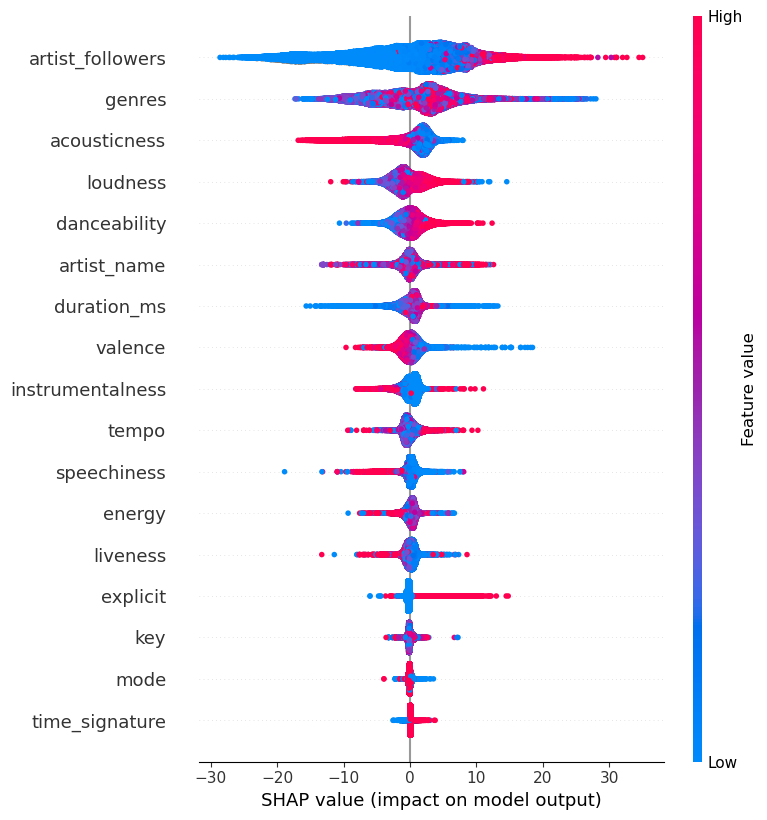

In [71]:
shap.summary_plot(shap_values, X_test)

## Random Forest

In [67]:
randForest_model = RandomForestRegressor(n_estimators=100)

randForest_model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
randForest_preds = randForest_model.predict(X_test)
# np.savetxt("randForest_preds.csv", randForest_preds)

In [69]:
randForest_rmse = round(np.sqrt(mean_squared_error(y_test, randForest_preds)),2)
randForest_rmse

13.44

### Feature Importance

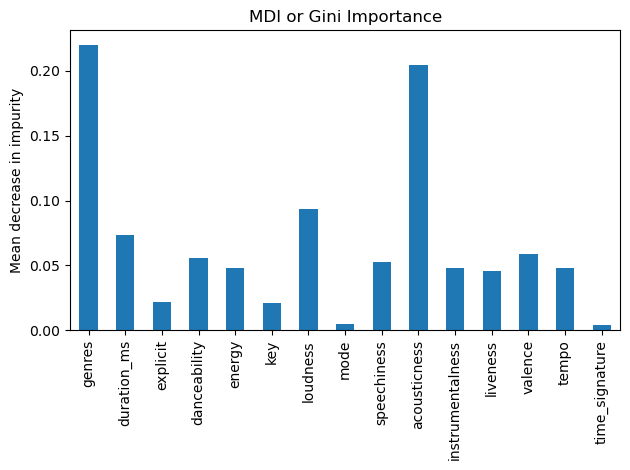

In [40]:
importances = randForest_model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SHAP

In [44]:
model = randForest_model

shap.initjs()

In [45]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

MemoryError: Unable to allocate 1.86 MiB for an array with shape (488261,) and data type int32

In [ ]:
plt.title('Shap values for RF')
shap.summary_plot(shap_values, X_train)

## AdaBoost

In [70]:
ada_model = AdaBoostRegressor(
    n_estimators=500,
    learning_rate=0.005,
    loss='square',
    random_state=42
)

ada_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
ada_preds = ada_model.predict(X_test)
# np.savetxt("xgb_preds.csv", ada_preds)

In [ ]:
ada_rmse = round(np.sqrt(mean_squared_error(y_test, ada_preds)),2)
ada_rmse

15.78

## LightGBM

In [ ]:
lgb_model = lgb.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

lgb_model.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.95, learning_rate=0.05, max_depth=5,
              metric='mse', n_estimators=1000, n_jobs=4, num_leaves=4,
              random_state=42, subsample=0.9)

In [ ]:
lgb_preds = lgb_model.predict(X_test)
# np.savetxt("xgb_preds.csv", lgb_preds)

In [ ]:
lgb_rmse = round(np.sqrt(mean_squared_error(y_test, lgb_preds)),2)
lgb_rmse

13.91

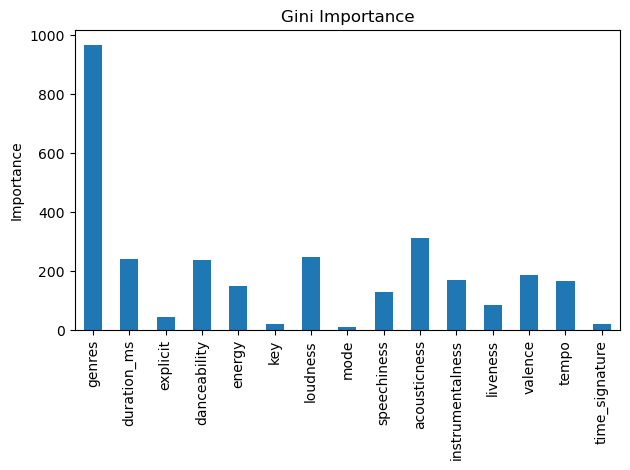

In [43]:
importances = lgb_model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Gini Importance")
ax.set_ylabel("Importance")
fig.tight_layout()

## Catboost

In [ ]:
catboost_model = CatBoostRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    thread_count=-1,
    max_depth=6,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=0.3,
    od_type="Iter"
)

catboost_model.fit(X_train, y_train)

iteritems is deprecated and will be removed in a future version. Use .items instead.


In [ ]:
catboost_preds = catboost_model.predict(X_test)
# np.savetxt("xgb_preds.csv", catboost_preds)

In [ ]:
catboost_rmse = round(np.sqrt(mean_squared_error(y_test, catboost_preds)), 2)
catboost_rmse

13.06

# KNN

In [33]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights= "distance")

knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

In [34]:
knn_mse = round(np.sqrt(mean_squared_error(y_test, knn_preds)), 2)

print("Mean Squared Error:", knn_mse)

Mean Squared Error: 16.33


## Explainable Boosting Machine

In [61]:
ebm = ExplainableBoostingRegressor(random_state = 1)
ebm.fit(X_train, y_train)

ebm_preds = ebm.predict(X_test)

c:\Users\Jonas\anaconda3\envs\geoenv\lib\site-packages\interpret\glassbox\ebm\ebm.py:405: UserWarning:

Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]



In [62]:
ebm_rmse = round(np.sqrt(mean_squared_error(y_test, ebm_preds)), 2)
ebm_rmse 

161.6998388306538

All predictors: 114.09932471120302

In [63]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2347660075888/ -->

In [57]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_11776\3505171271.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/1381296388560/ -->

# Stacking

## Average prediction

In [ ]:
xgb_pred = np.getfromtxt("xgb_preds.csv", delimiter = ",")

In [51]:
avg_preds = np.mean([
    xgb_preds,
    randForest_preds,
    ada_preds,
    lgb_preds,
    catboost_preds
], axis = 0)

round(np.sqrt(mean_squared_error(avg_preds, y_test)), 2)

12.82

## True Stacking

In [31]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 42 # for reproducibility
NFOLDS = 5 # set number of folds for out-of-fold prediction
kf = KFold(
    n_splits=NFOLDS,
    shuffle=True,
    random_state=SEED
) # K-Folds cross-validator

# oof = out of fold
def get_oof(clf, x_train, y_train, x_test):
    """
    Popular function on Kaggle.
    
    Trains a classifier on 4/5 of the training data and
    predicts the rest (1/5). This procedure is repeated for all 5 folds,
    thus we have predictions for all training set. This prediction is one
    column of meta-data, later on used as a feature column by a meta-algorithm.
    We predict the test part and average predictions across all 5 models.
    
    Keyword arguments:
    clf -- classifier
    x_train -- 4/5 of training data
    y_train -- corresponding labels
    x_test -- all test data
    
    """
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

### Models

In [32]:
xgb_model = xgb.XGBRegressor(n_estimators = 1000)

randForest_model = RandomForestRegressor(n_estimators=100)

ada_model = AdaBoostRegressor(
    n_estimators=500,
    learning_rate=0.005,
    loss='square',
    random_state=42
)

lgb_model = lgb.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

catboost_model = CatBoostRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    thread_count=-1,
    max_depth=6,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=0.3,
    od_type="Iter"
)

knn_model = KNeighborsRegressor(n_neighbors=5, weights= "distance")


In [33]:
xgb_oof_train, xgb_oof_test = get_oof(xgb_model, X_train, y_train, X_test)
ada_oof_train, ada_oof_test = get_oof(ada_model, X_train, y_train, X_test)
rf_oof_train, rf_oof_test = get_oof(randForest_model, X_train, y_train, X_test)
lgbm_oof_train, lgbm_oof_test = get_oof(lgb_model, X_train, y_train, X_test)
cat_oof_train, cat_oof_test = get_oof(catboost_model, X_train, y_train, X_test)
knn_oof_train, knn_oof_test = get_oof(knn_model, X_train, y_train, X_test)

iteritems is deprecated and will be removed in a future version. Use .items instead.


In [ ]:
xgb_oof_train, xgb_oof_test = get_oof(xgb_model, X_train, y_train, X_test)

In [ ]:
ada_oof_train, ada_oof_test = get_oof(ada_model, X_train, y_train, X_test)

In [ ]:
rf_oof_train, rf_oof_test = get_oof(randForest_model, X_train, y_train, X_test)

In [ ]:
lgbm_oof_train, lgbm_oof_test = get_oof(lgb_model, X_train, y_train, X_test)

In [ ]:
cat_oof_train, cat_oof_test = get_oof(catboost_model, X_train, y_train, X_test)

In [34]:
x_train = np.concatenate((
    xgb_oof_train,
    ada_oof_train,
    rf_oof_train,
    lgbm_oof_train,
    cat_oof_train
), axis=1)

x_test = np.concatenate((
    xgb_oof_test,
    ada_oof_test,
    rf_oof_test,
    lgbm_oof_test,
    cat_oof_test
), axis=1)

In [51]:
meta_df = pd.DataFrame(x_train, columns=['XGB', 'AdaB', 'RF', 'Lgbm', 'Cat'])
meta_df['label'] = np.array(y_train)
meta_df.to_csv("meta_df.csv")
meta_df

,XGB,AdaB,RF,Lgbm,Cat,label
0,1.887029,14.603627,7.687500,11.800384,10.353727,0
1,39.716946,36.291190,38.160000,41.228107,46.678807,50
2,19.796391,28.876088,24.920000,19.453944,19.311011,24
3,16.478615,23.992895,21.840000,20.750622,23.003239,5
4,42.506340,37.285610,40.471667,36.271818,36.842272,42
...,...,...,...,...,...,...
93862,33.214222,29.932442,34.390000,31.198615,32.692503,26
93863,30.726089,36.607231,38.070000,33.754470,34.364364,14
93864,6.356585,13.989696,15.930000,12.872874,12.207797,12
93865,24.173346,36.549895,27.495000,32.181438,29.613819,24


In [43]:
meta_df.shape

(93867, 6)

In [52]:
meta_model =  xgb.XGBRegressor(n_estimators = 1000)

meta_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [53]:
meta_preds = meta_model.predict(x_test)

In [54]:
meta_rmse = round(np.sqrt(mean_squared_error(meta_preds, y_test)), 2)
meta_rmse

13.02